In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tools import read_predicted_boxes, read_ground_truth_boxes
from itertools import product

In [13]:
if 1:
    print(1)
if 0:
    print(0)
if 23:
    print(23)
if -123:
    print(-123)
if 1.3:
    print(1.3)

1
23
-123
1.3


In [2]:
def area(bbox):
    return (bbox[2] - bbox[0]) * (bbox[3] - bbox[1])

def calculate_iou(prediction_box, gt_box):
    """Calculate intersection over union of single predicted and ground truth box.

    Args:
        prediction_box (np.array of floats): location of predicted object as
            [xmin, ymin, xmax, ymax]
        gt_box (np.array of floats): location of ground truth object as
            [xmin, ymin, xmax, ymax]

        returns:
            float: value of the intersection of union for the two boxes.
    """

    # Compute intersection
    intersection_box = [
        max(prediction_box[0], gt_box[0]), max(prediction_box[1], gt_box[1]), 
        min(prediction_box[2], gt_box[2]), min(prediction_box[3], gt_box[3])
    ]
    intersection = area(intersection_box)
    
    # Compute union
    union = (area(prediction_box) + area(gt_box) - intersection)
    
    print(prediction_box, gt_box)
    print(intersection, union)
    
    iou = intersection / union
    assert iou >= 0 and iou <= 1
    print(iou)
    return iou

In [14]:
def calculate_precision(num_tp, num_fp, num_fn):
    """ Calculates the precision for the given parameters.
        Returns 1 if num_tp + num_fp = 0

    Args:
        num_tp (float): number of true positives
        num_fp (float): number of false positives
        num_fn (float): number of false negatives
    Returns:
        float: value of precision
    """
    positives = (num_tp + num_fp)
    return num_tp/positives if positives else 1
    

In [15]:
def calculate_recall(num_tp, num_fp, num_fn):
    """ Calculates the recall for the given parameters.
        Returns 0 if num_tp + num_fn = 0
    Args:
        num_tp (float): number of true positives
        num_fp (float): number of false positives
        num_fn (float): number of false negatives
    Returns:
        float: value of recall
    """
    cases = (num_tp + num_fn)
    return num_tp/cases if cases else 1

In [16]:
def get_all_box_matches(prediction_boxes, gt_boxes, iou_threshold):
    """Finds all possible matches for the predicted boxes to the ground truth boxes.
        No bounding box can have more than one match.

        Remember: Matching of bounding boxes should be done with decreasing IoU order!

    Args:
        prediction_boxes: (np.array of floats): list of predicted bounding boxes
            shape: [number of predicted boxes, 4].
            Each row includes [xmin, ymin, xmax, ymax]
        gt_boxes: (np.array of floats): list of bounding boxes ground truth
            objects with shape: [number of ground truth boxes, 4].
            Each row includes [xmin, ymin, xmax, ymax]
    Returns the matched boxes (in corresponding order):
        prediction_boxes: (np.array of floats): list of predicted bounding boxes
            shape: [number of box matches, 4].
        gt_boxes: (np.array of floats): list of bounding boxes ground truth
            objects with shape: [number of box matches, 4].
            Each row includes [xmin, ymin, xmax, ymax]
    """
#     matches = []
#     # Find all possible matches with a IoU >= iou threshold
#     # ious = np.zeros(len(prediction_boxes) * len(gt_boxes))
#     # print("ious len:", len(ious))
#     for i, (p, gt) in enumerate(product(prediction_boxes, gt_boxes)):
#         if (iou := calculate_iou(p, gt)) >= iou_threshold:
#             matches.append(((p, gt), iou))
#     # Sort all matches on IoU in descending order
#     matches = sorted(matches, key = lambda m: m[1], reverse=True)
#     print(matches)
#     # Find all matches with the highest IoU threshold

    matches = []

    for p in prediction_boxes:
        p_matches = []
        for gt in gt_boxes:
            if (iou := calculate_iou(p, gt)) >= iou_threshold:
                p_matches.append(((p, gt), iou))
            top = sorted(p_matches, key = lambda m: m[1], reverse=True)[0]


    return np.array([]), np.array([])

In [6]:
def calculate_individual_image_result(prediction_boxes, gt_boxes, iou_threshold):
    """Given a set of prediction boxes and ground truth boxes,
       calculates true positives, false positives and false negatives
       for a single image.
       NB: prediction_boxes and gt_boxes are not matched!

    Args:
        prediction_boxes: (np.array of floats): list of predicted bounding boxes
            shape: [number of predicted boxes, 4].
            Each row includes [xmin, ymin, xmax, ymax]
        gt_boxes: (np.array of floats): list of bounding boxes ground truth
            objects with shape: [number of ground truth boxes, 4].
            Each row includes [xmin, ymin, xmax, ymax]
    Returns:
        dict: containing true positives, false positives, true negatives, false negatives
            {"true_pos": int, "false_pos": int, false_neg": int}
    """

    raise NotImplementedError

In [7]:
def calculate_precision_recall_all_images(
    all_prediction_boxes, all_gt_boxes, iou_threshold):
    """Given a set of prediction boxes and ground truth boxes for all images,
       calculates recall and precision over all images
       for a single image.
       NB: all_prediction_boxes and all_gt_boxes are not matched!

    Args:
        all_prediction_boxes: (list of np.array of floats): each element in the list
            is a np.array containing all predicted bounding boxes for the given image
            with shape: [number of predicted boxes, 4].
            Each row includes [xmin, ymin, xmax, ymax]
        all_gt_boxes: (list of np.array of floats): each element in the list
            is a np.array containing all ground truth bounding boxes for the given image
            objects with shape: [number of ground truth boxes, 4].
            Each row includes [xmin, ymin, xmax, ymax]
    Returns:
        tuple: (precision, recall). Both float.
    """
    raise NotImplementedError

In [8]:
def get_precision_recall_curve(
    all_prediction_boxes, all_gt_boxes, confidence_scores, iou_threshold
):
    """Given a set of prediction boxes and ground truth boxes for all images,
       calculates the recall-precision curve over all images.
       for a single image.

       NB: all_prediction_boxes and all_gt_boxes are not matched!

    Args:
        all_prediction_boxes: (list of np.array of floats): each element in the list
            is a np.array containing all predicted bounding boxes for the given image
            with shape: [number of predicted boxes, 4].
            Each row includes [xmin, ymin, xmax, ymax]
        all_gt_boxes: (list of np.array of floats): each element in the list
            is a np.array containing all ground truth bounding boxes for the given image
            objects with shape: [number of ground truth boxes, 4].
            Each row includes [xmin, ymin, xmax, ymax]
        scores: (list of np.array of floats): each element in the list
            is a np.array containting the confidence score for each of the
            predicted bounding box. Shape: [number of predicted boxes]

            E.g: score[0][1] is the confidence score for a predicted bounding box 1 in image 0.
    Returns:
        precisions, recalls: two np.ndarray with same shape.
    """
    # Instead of going over every possible confidence score threshold to compute the PR
    # curve, we will use an approximation
    confidence_thresholds = np.linspace(0, 1, 500)
    # YOUR CODE HERE

    precisions = [] 
    recalls = []
    return np.array(precisions), np.array(recalls)

In [9]:
def plot_precision_recall_curve(precisions, recalls):
    """Plots the precision recall curve.
        Save the figure to precision_recall_curve.png:
        'plt.savefig("precision_recall_curve.png")'

    Args:
        precisions: (np.array of floats) length of N
        recalls: (np.array of floats) length of N
    Returns:
        None
    """
    plt.figure(figsize=(20, 20))
    plt.plot(recalls, precisions)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.xlim([0.8, 1.0])
    plt.ylim([0.8, 1.0])
    plt.savefig("precision_recall_curve.png")

In [10]:
def calculate_mean_average_precision(precisions, recalls):
    """ Given a precision recall curve, calculates the mean average
        precision.

    Args:
        precisions: (np.array of floats) length of N
        recalls: (np.array of floats) length of N
    Returns:
        float: mean average precision
    """
    # Calculate the mean average precision given these recall levels.
    recall_levels = np.linspace(0, 1.0, 11)
    # YOUR CODE HERE
    average_precision = 0
    return average_precision

In [11]:
def mean_average_precision(ground_truth_boxes, predicted_boxes):
    """ Calculates the mean average precision over the given dataset
        with IoU threshold of 0.5

    Args:
        ground_truth_boxes: (dict)
        {
            "img_id1": (np.array of float). Shape [number of GT boxes, 4]
        }
        predicted_boxes: (dict)
        {
            "img_id1": {
                "boxes": (np.array of float). Shape: [number of pred boxes, 4],
                "scores": (np.array of float). Shape: [number of pred boxes]
            }
        }
    """
    # DO NOT EDIT THIS CODE
    all_gt_boxes = []
    all_prediction_boxes = []
    confidence_scores = []

    for image_id in ground_truth_boxes.keys():
        pred_boxes = predicted_boxes[image_id]["boxes"]
        scores = predicted_boxes[image_id]["scores"]

        all_gt_boxes.append(ground_truth_boxes[image_id])
        all_prediction_boxes.append(pred_boxes)
        confidence_scores.append(scores)

    precisions, recalls = get_precision_recall_curve(
        all_prediction_boxes, all_gt_boxes, confidence_scores, 0.5)
    plot_precision_recall_curve(precisions, recalls)
    mean_average_precision = calculate_mean_average_precision(precisions, recalls)
    print("Mean average precision: {:.4f}".format(mean_average_precision))

[ 0  0 10 10] [0 0 8 8]
64 100
0.64
[ 0  0 10 10] [ 7  7 14 14]
9 140
0.06428571428571428
[ 6  6 15 15] [0 0 8 8]
4 141
0.028368794326241134
[ 6  6 15 15] [ 7  7 14 14]
49 81
0.6049382716049383
[((array([ 0,  0, 10, 10]), array([0, 0, 8, 8])), 0.64), ((array([ 6,  6, 15, 15]), array([ 7,  7, 14, 14])), 0.6049382716049383)]
Mean average precision: 0.0000


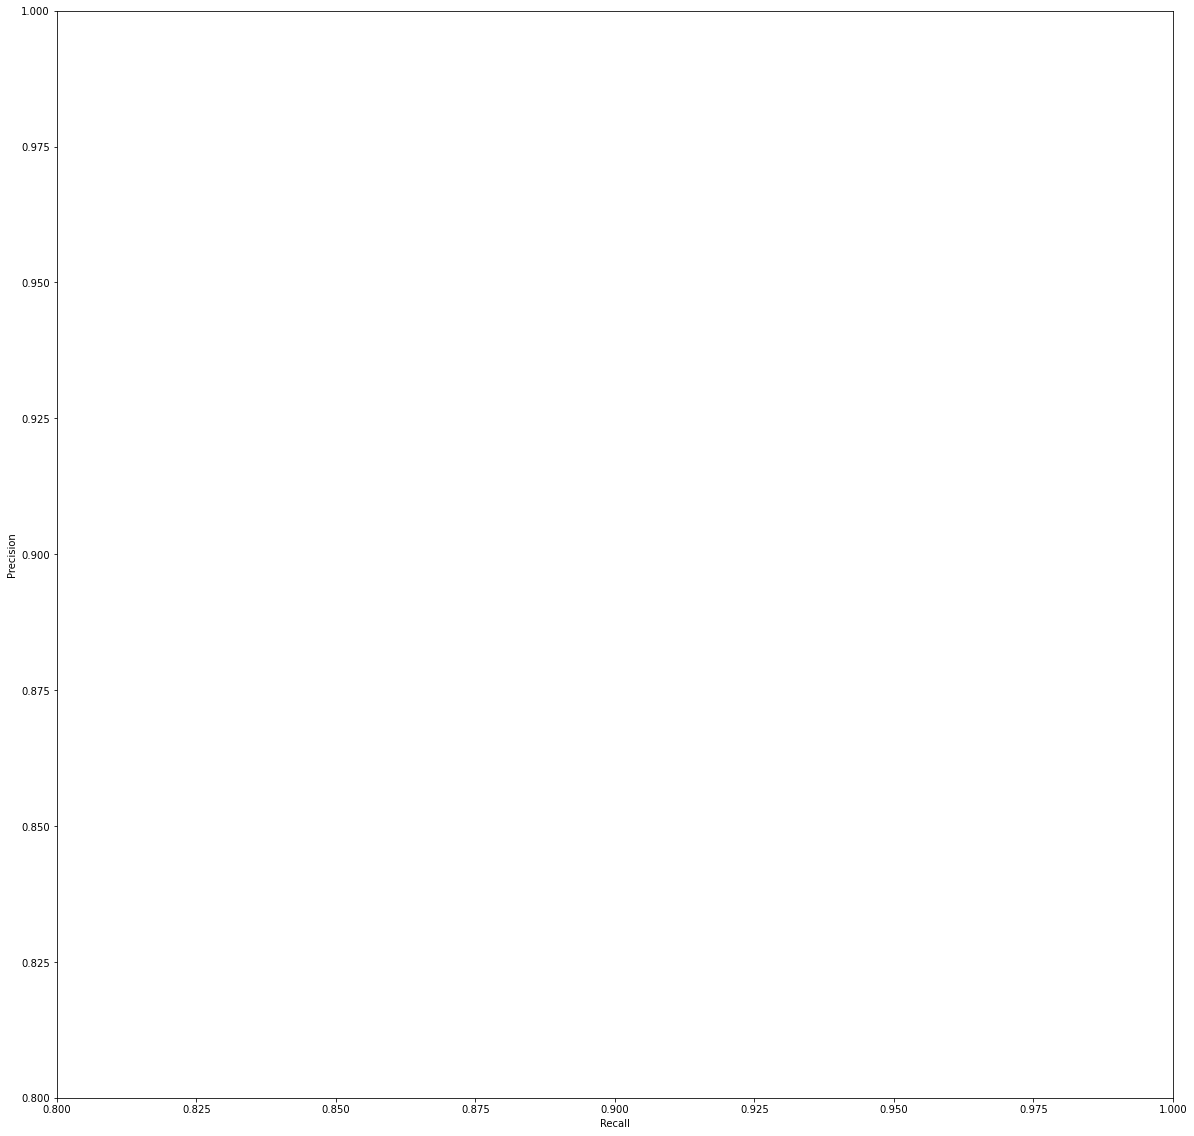

In [12]:


ground_truth_boxes = read_ground_truth_boxes()
predicted_boxes = read_predicted_boxes()

test_pb = np.array([[0, 0, 10, 10],[6, 6, 15, 15]])
test_gtb = np.array([[0, 0, 8, 8],[7, 7, 14, 14]])

get_all_box_matches(test_pb, test_gtb, 0.5)

mean_average_precision(ground_truth_boxes, predicted_boxes)